
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/EffiSciencesResearch/hackathon42/blob/main/starting_pack_hackathon42.ipynb)


In [13]:
%load_ext autoreload
%autoreload 2
from get import *

{0: '00_toy_dataset', 1: '01_mnist_cc', 2: '02_mnist_constant_image', 3: '03_mnist_constant_image_random_row', 4: '04_mnist_uniform_color_random_row', 5: '05_mnist_uniform_color_low_mix_rate', 6: '06_mnist_sum', 7: '07_mnist_sum_bis', 8: '08_mnist_sum_noise_level', 12: '12_mnist_mysterious', 13: '13_mnist_mysterious', 23: '23_mnist_embed', 456: '456_mnist_embed', 999: '999_humans'}
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Labeled ds shape:  torch.Size([500, 2])
Unlabeled ds shape:  (500, 2)
Validation ds shape:  (500, 2)
Labels shape:  (500,)
Labeled ds labels:  [0 1]



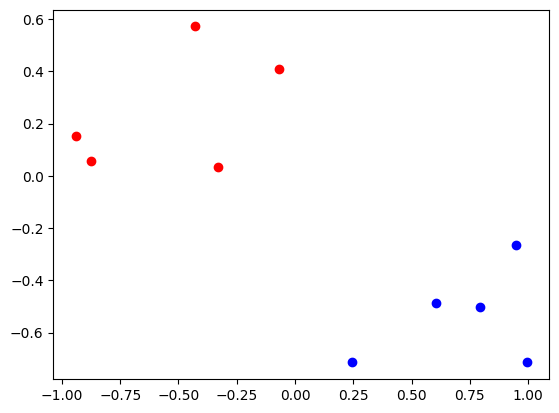

[-0.21272896  0.03749569]
[-0.05312868 -0.89766899]
[ 0.70909479 -0.53428289]
[-0.31999123 -0.01599654]
[ 0.73929937 -0.37952943]
[-0.82373114 -0.6364728 ]
[0.55359687 0.00826568]
[ 0.69509527 -0.35438041]
[-0.63636469 -0.48378471]
[-0.13930694 -0.07202917]
[-0.66900045 -0.73343148]
[0.41320826 0.85549147]
[0.07069554 0.7354042 ]
[0.27064669 0.41524117]
[-0.60702607 -0.78757234]
[-0.57650828  0.55175451]
[-0.91700535  0.61591466]
[-0.35586493  0.53552924]
[ 0.11948932 -0.77206823]
[0.71586983 0.28781591]


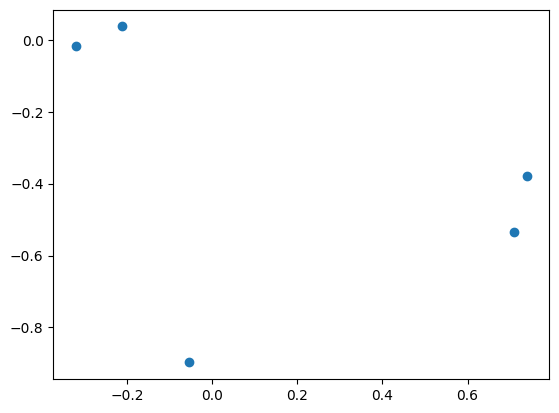

In [14]:
# Display dataset 0 (toy)
display_dataset(n_dataset=0, N_data=5)


In [15]:
import pandas as pd

tbatch = 100
nb_epochs = 20

nbbatchs = int(X_train.shape[0]/tbatch)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)

net.train()

def evaluate(X_test):
    net.eval()
    with torch.no_grad():
        y_pred = net(X_test)
    correct_test = (torch.argmax(y_pred, axis=1) == y_test).sum().item()
    net.train()
    return correct_test/len(X_test)

for epoch in tqdm(range(nb_epochs)):  # loop over the dataset multiple times
    correct = 0
    for i in (range(nbbatchs)):
        
        optimizer.zero_grad()
        
        X_batch = X_train[i*tbatch:(i+1)*tbatch]
        y_batch = y_train[i*tbatch:(i+1)*tbatch]

        # Compute forward / backward
        y_pred = net(X_batch)
        correct += (torch.argmax(y_pred, axis=1) == y_batch).sum().item()

        loss = criterion(y_pred, y_batch)
        

        loss.backward()
        optimizer.step()
        # break
    print("acc train:", correct/X_train.shape[0], "acc test:", evaluate(X_test))




NameError: name 'X_train' is not defined

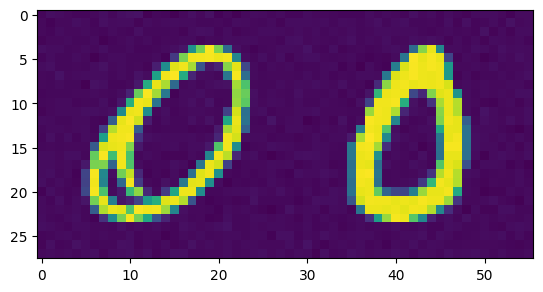

0



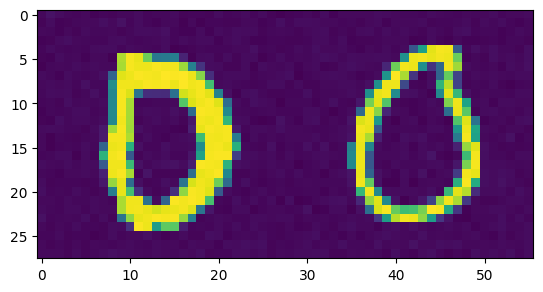

0



In [ ]:
import matplotlib.pyplot as plt

for i in range(2):
    plt.imshow(X_labeled[i, 0])
    plt.show()
    print(y_labeled[i])
    print("")

In [ ]:
net.train()
with torch.no_grad():
    y_pred = net(X_test)


print(y_pred.shape)
pred = torch.argmax(y_pred, dim=1)

pred = pred.cpu().numpy()
df = pd.DataFrame(pred)
df.to_csv("example_submission.csv", header=False, index=False)

torch.Size([317, 10])
